# Synthetic Light Curve Exploration

This notebook is my first attempt to setup a Light Curve Analysis Notebook.

Dates:
* initial Jul 08, 2025
* last updated 


Initial light curve data files and code are from:

https://github.com/drjenncash/SyntheticLightCurves.git

In [1]:
## imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 0: Data File Inspection

The first step of light curve analysis is always a visual inspection of the data, but before that you may need an extra step to inspect the data file itself.

If it is a new data file format, you may want to look at the file itself before working with it in Python. 
Find out:
* Is it an ascii file or another format?
* Does the file have a header line above the data? How many lines for the header?
* What is the seperator or delimitor on the data?
* How many columns does the data have? What data type for each column?

The answers to these questions will influence how you read in the data file. 

Examples of a variety of data files are covered in our Tutorial 7 at https://github.com/drjenncash/SCSU-PAARE-python-intro-tutorials

For the synthetic data files I have provided, the files all have the same format. 

* The filename are of the form `syn_N.txt`
* They are plain ascii test files that can be examined in any text viewer.
* The have a header line showing the two columns are Time and FLux.
* The data in the columns are floats.
* The separator is a space character

If you grabbed the entire light curve repository then you should be able to address of the files using the relative path from this notebook. 

The cell below does a quick check for the file location. If it doesn't find the data file in the expected location, then you can use the reported working directory to help setup your path. 

In [103]:
testfilename = './syn_data/syn_1.txt'

if os.path.isfile(testfilename):
    print('It finds the file in the expected location')
else:
    print('The file was not found in the expected location.')
    print('Your notebooks working directory is: \n')
    print(os.getcwd())


It finds the file in the expected location


As another example, when I loaded the tutorials into Anaconda in the Cloud, I ended up using a file path name of the form 
`file = '~/clone/SyntheticLightCurves/syn_data/syn_1.txt'`

# Step 1: Visual Inspection

Once you have the data in a usable form, you will want to look at the light curve data. A simple time vs brightness plot will serve this purpose. As you play with the data, you may want to try line plots or scatter plots with different options.

Things to note about the data include but not limited to:
* How many data points?
* What is the time span of the data?
* What is the brightness range of the data?
* When plotted, can you see a pattern in the brightness variation?
    * Is there a trend?
    * Is it periodic?
    * Can you estimate a period?
* When plotted, can you see a pattern in the time of the observations?
    * Is it a regular observation timing?
    * Are there large gaps?
    *  



## Syn1.txt

In [104]:
# Set the filename and path
file = './syn_data/syn_1.txt'

# Read in the data file
data = pd.read_csv(file, sep = ' ')

#uncomment the line below to see the dataframe
#data

In [105]:
# Information about data1
print('Length of data set:',len(data))
print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
print('Time range:',np.min(data['Time']),np.max(data['Time']))

Length of data set: 100
Brightness range: 11.000125872326125 12.999874127673875
Time range: 0.0 7.25


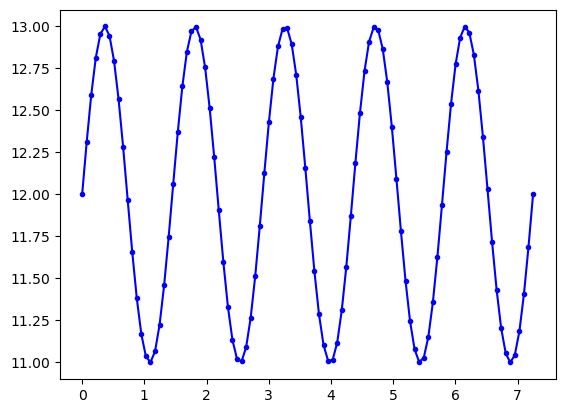

In [108]:
plt.plot(data['Time'],data['Flux'],'b.-')

**Notes**

For this light curve data file, there are 100 observations.

There is a clear pattern of oscillation that is well sampled. 

There are about 5 cycles with an amplitude of about 1 flux unit.

The period is between 1 and 2 time units, probably about 1.45. 

## Function for first initial look

To make life easier, I created a quick function to do the steps above for each light curve file. You just need to change the filename (making sure you have the correct path.

In [112]:
#Function for a simple light curve initial inspection
def lc_visual(file):

    data = pd.read_csv(file, sep = ' ')

    print('Length of data set:',len(data))
    print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
    print('Time range:',np.min(data['Time']),np.max(data['Time']))

    plt.plot(data['Time'],data['Flux'],'b.-')

    return

## Syn2.txt

Length of data set: 100
Brightness range: 11.000125872326125 12.999874127673875
Time range: 0.0 15.0


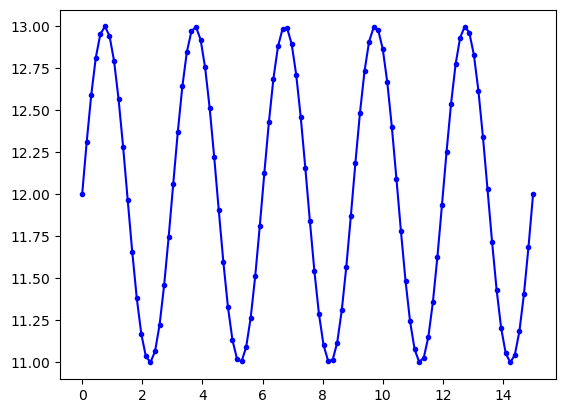

In [113]:
file = './syn_data/syn_2.txt'
lc_visual(file)

**Syn_2 Notes**

For this light curve data file, there are 100 observations, but the time span is now about 15.

There is a clear pattern of oscillation that is well sampled. 

There are about 5 cycles with an amplitude of about 1 flux unit.

The period is about 3 time units. 

----

Length of data set: 100
Brightness range: 11.001132660816992 12.998867339183008
Time range: 0.0 24.0


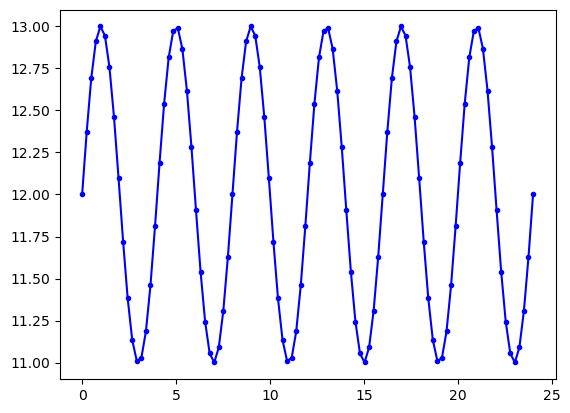

In [115]:
file = './syn_data/syn_3.txt'
lc_visual(file)

Length of data set: 100
Brightness range: 11.001132660816992 12.998867339183008
Time range: 0.0 29.55


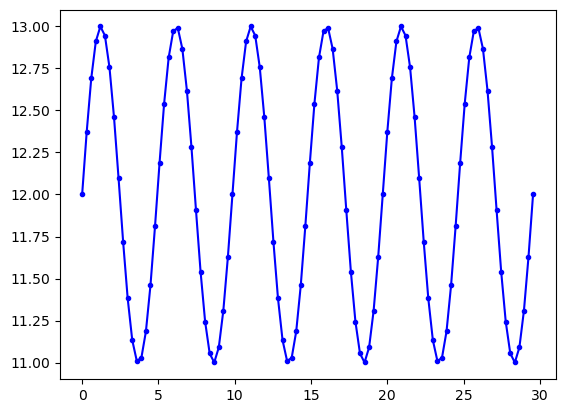

In [116]:
file = './syn_data/syn_4.txt'
lc_visual(file)

Length of data set: 100
Brightness range: 10.557459168639518 13.362726600136224
Time range: 0.0 29.55


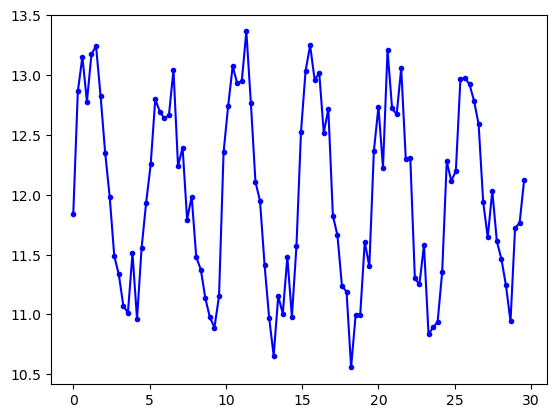

In [119]:
file = './syn_data/syn_9.txt'
lc_visual(file)

Length of data set: 1000
Brightness range: 10.901774849538892 13.09335029553094
Time range: 0.259649791121758 295.29788530515685


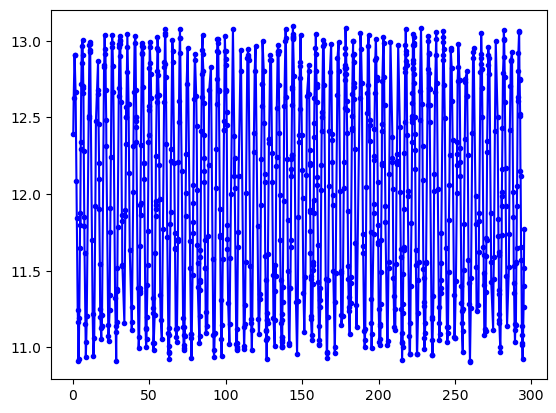

In [118]:
file = './syn_data/syn_14.txt'
lc_visual(file)

Length of data set: 500
Brightness range: 7.026054201085541 16.959905987977038
Time range: 0.1369813984883017 226.5463604452172


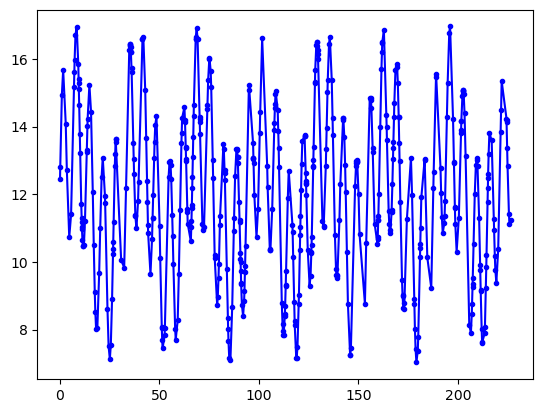

In [114]:
file = './syn_data/syn_24.txt'
lc_visual(file)